In [1]:
from covidttr import *
import matplotlib.pyplot as plt

In [2]:
confirmed = load_remote_data('Confirmed')
deaths = load_remote_data('Deaths')
recovered = load_remote_data('Recovered')

In [3]:
countries = [
        'China',
        'Netherlands',
        'France',
        'US',
        'Spain',
        'United Kingdom',
        'Iran',
        'Germany',
        'Italy',
        'Global'
    ]

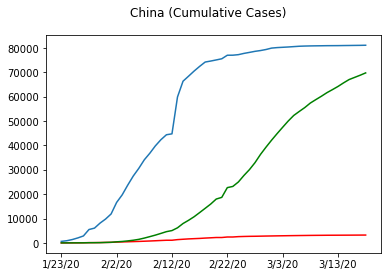

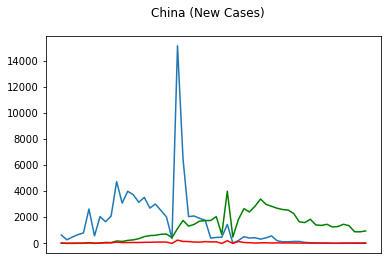

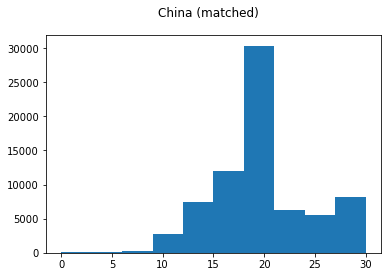

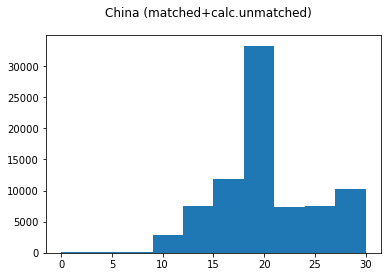

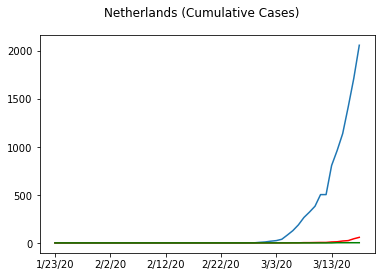

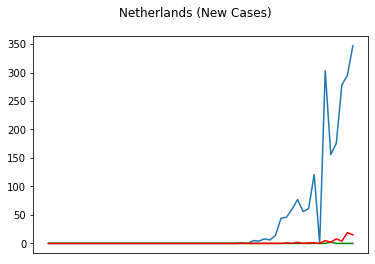

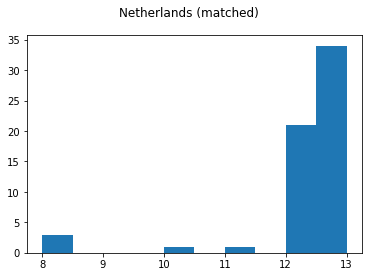

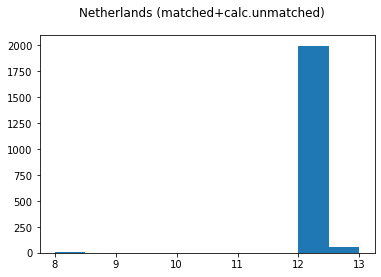

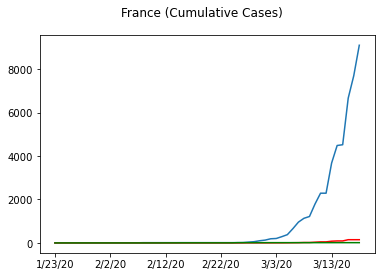

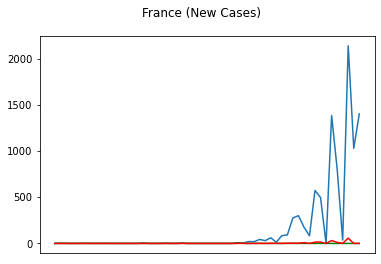

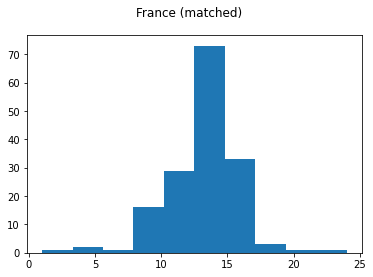

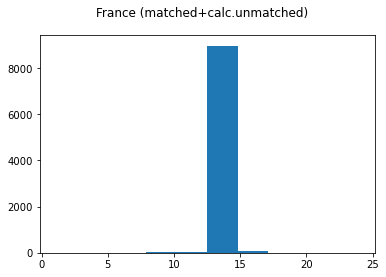

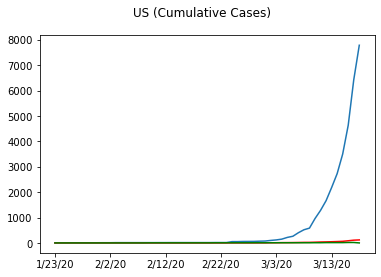

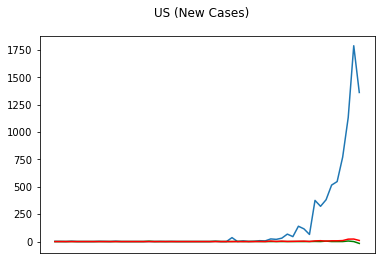

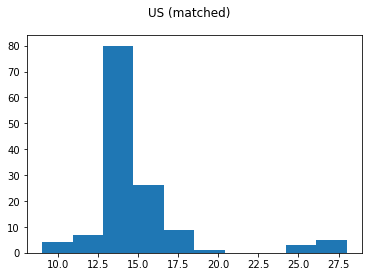

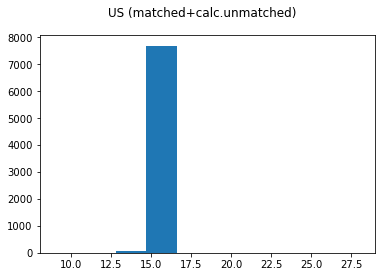

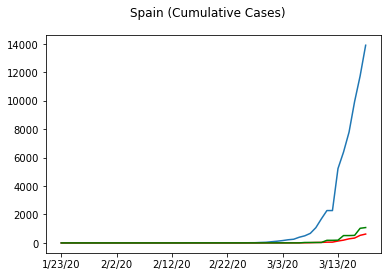

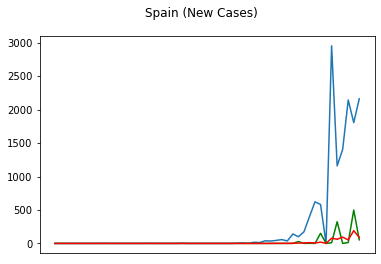

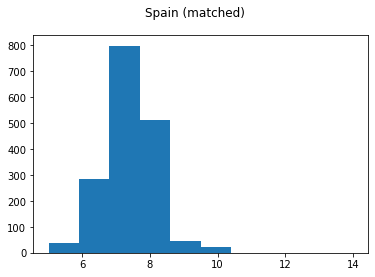

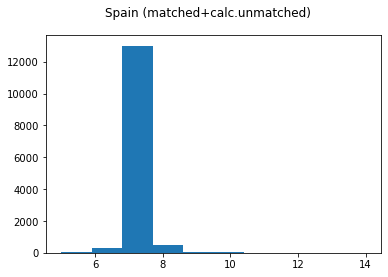

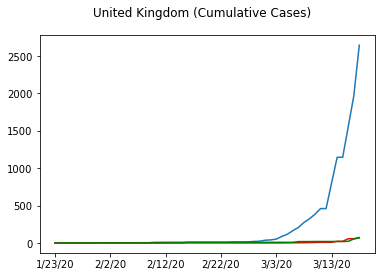

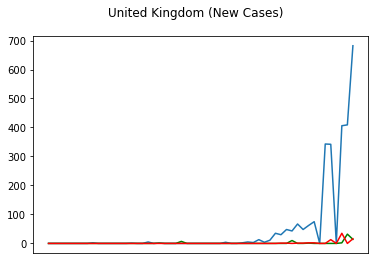

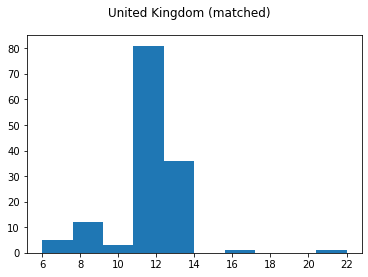

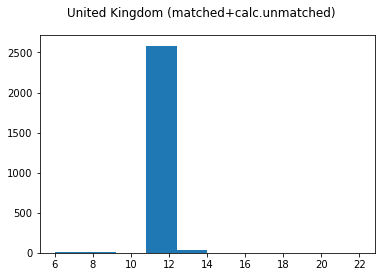

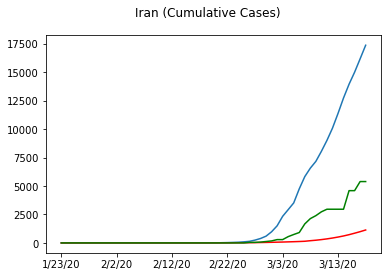

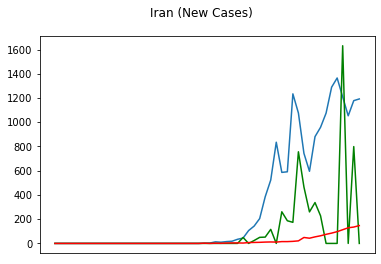

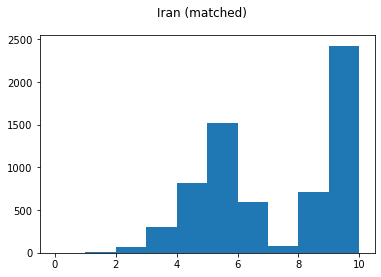

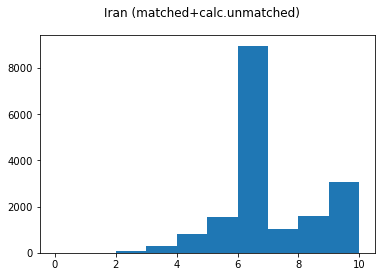

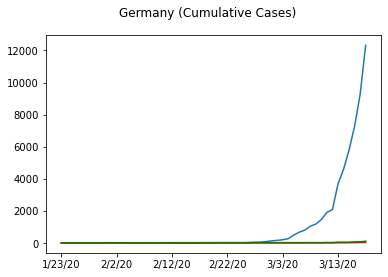

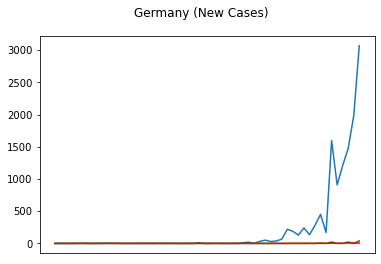

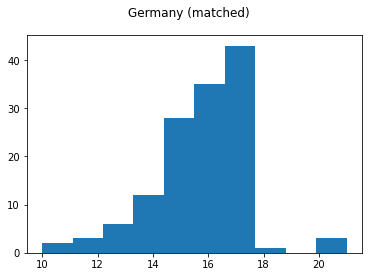

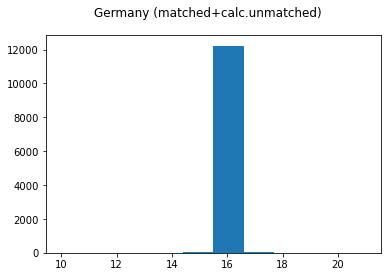

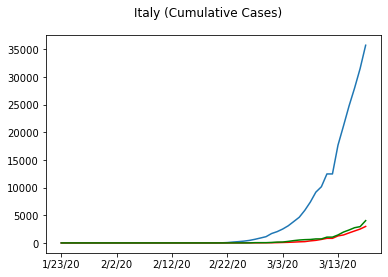

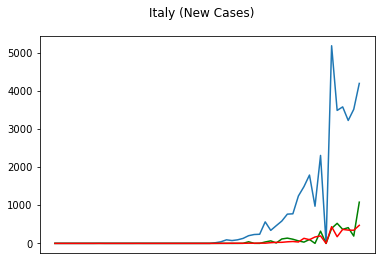

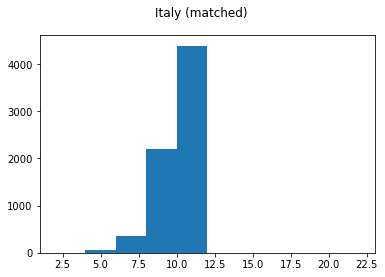

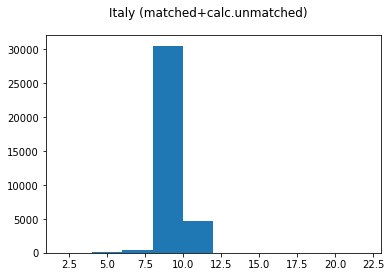

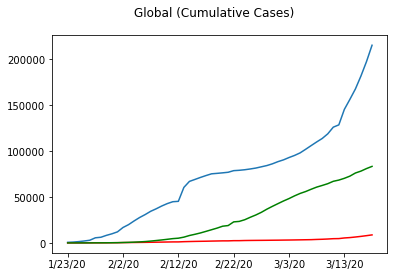

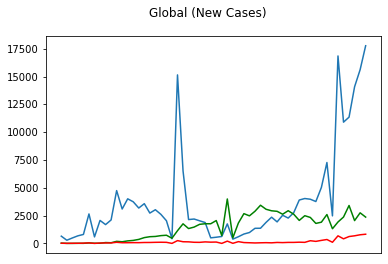

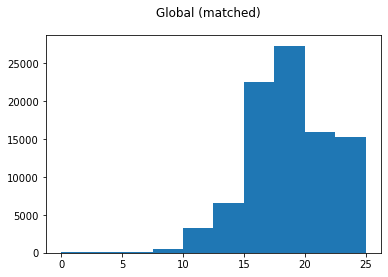

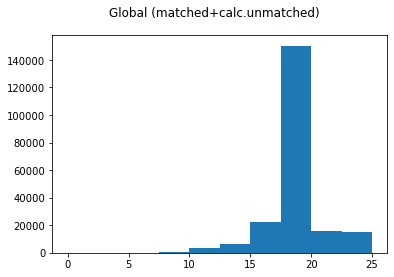

In [4]:
def replace_if_less(input_array, threshold_value):
    new_array = []
    for item in input_array:
        if item < threshold_value:
            new_array.append(threshold_value)
        else:
            new_array.append(item)
    return new_array

for country in countries:
    if country == 'Global':
        confirmed_country = confirmed.sum()[3:]
        deaths_country = deaths.sum()[3:]
        recovered_country = recovered.sum()[3:]
    else:
        confirmed_country = confirmed.loc[country][3:]
        deaths_country = deaths.loc[country][3:]
        recovered_country = recovered.loc[country][3:]
    confirmed_country.plot()
    deaths_country.plot(color='r')
    recovered_country.plot(color='g')
    plt.suptitle(country+' (Cumulative Cases)')
    plt.show()
    
    new_confirmed_dict = create_new_dict(confirmed_country)
    new_deaths_dict = create_new_dict(deaths_country)
    new_recovered_dict = create_new_dict(recovered_country)
    
    plt.plot(range(len(new_confirmed_dict)), list(new_confirmed_dict.values()))
    plt.plot(range(len(new_recovered_dict)), list(new_recovered_dict.values()),color='g')
    plt.plot(range(len(new_deaths_dict)), list(new_deaths_dict.values()), color='r')
    
    # plt.xticks(range(len(new_confirmed_dict)), list(new_confirmed_dict.keys()))
    plt.xticks([])
    plt.suptitle(country+' (New Cases)')
    plt.show()
    
    confirmed_time_array = create_distinct(new_confirmed_dict)
    deaths_time_array = create_distinct(new_deaths_dict)
    recovered_time_array = create_distinct(new_recovered_dict)
    
    results = interval_sets(confirmed_time_array,
                            deaths_time_array,
                            recovered_time_array,
                            len(new_confirmed_dict),
                            verbose=False)

    matched_intervals = results['matched']
    unmatched_intervals = results['unmatched']

    unmatched_new_intervals = replace_if_less(
        unmatched_intervals, mean(matched_intervals))

    complete = matched_intervals + unmatched_new_intervals
    
    plt.hist(matched_intervals)
    plt.suptitle(country+' (matched)')
    plt.show()
    plt.hist(complete)
    plt.suptitle(country+' (matched+calc.unmatched)')
    plt.show()
